## Evaluate NCES

In [34]:
import json
from collections import Counter
import seaborn as sns
sns.set_theme(style="whitegrid")

In [35]:
def get_diverse_predictions(kb):
    with open(f'datasets/{kb}/Results/NCES.json') as file:
        results = json.load(file)
    Results = [kb]
    top_performance = Counter()
    for i in range(len(results['GRU']['f1']['values'])):
        if min([results[key]['f1']['values'][i] for key in results]) < 10:
            preds = [(key, results[key]['prediction']['values'][i], results[key]['f1']['values'][i]) for key in results]
            preds_ = sorted(preds,key = lambda x: -x[-1])
            Results.append(preds)
            top_performance[preds_[0][0]] += 1
            if min([results[key]['f1']['values'][i] for key in results]) == 0:
                print("Drastic difference: ", preds_)
    print('\n\nTop performance: ', top_performance)
    return Results, top_performance

In [36]:
Res1, top1 = get_diverse_predictions('carcinogenesis')

Drastic difference:  [('LSTM', 'Hydrogen-2 ⊔ Selenium', 66.667), ('SetTransformer', 'Manganese-85 ⊔ Manganese-85', 50.0), ('GRU', 'Calcium-84 ⊔ Nitrogen-37', 0.0)]
Drastic difference:  [('SetTransformer', 'Compound ⊔ Compound', 96.866), ('LSTM', 'Carbon-21 ⊔ Compound', 92.14099999999999), ('GRU', 'Carbon-193 ⊔ Sulfur-74', 0.0)]
Drastic difference:  [('SetTransformer', 'Ketone ⊔ Oxygen-49', 100.0), ('GRU', 'Nitro ⊔ Phosphorus-62', 0.0), ('LSTM', 'Hydrogen-8 ⊔ Sulfide', 0.0)]
Drastic difference:  [('GRU', 'Iodine ⊔ (∃ inBond.(Carbon-29 ⊔ Oxygen-53))', 100.0), ('LSTM', 'Iodine ⊔ (∃ inBond.(Carbon-29 ⊔ Sulfur-72))', 94.253), ('SetTransformer', 'Manganese-85 ⊔ Manganese-85', 0.0)]
Drastic difference:  [('GRU', 'Di281 ⊔ Ring ⊔ Ring', 99.679), ('SetTransformer', 'Imine ⊔ Ring', 98.99900000000001), ('LSTM', 'Di8 ⊔ Oxygen-41', 0.0)]


Top performance:  Counter({'GRU': 5, 'SetTransformer': 4, 'LSTM': 2})


In [37]:
Res2, top2 = get_diverse_predictions('mutagenesis')

Drastic difference:  [('GRU', 'Carbon-27 ⊔ Carbon-27', 99.868), ('SetTransformer', 'Bromine ⊔ Carbon-27', 99.605), ('LSTM', 'Carbon-28 ⊔ Compound', 0.0)]
Drastic difference:  [('SetTransformer', 'Carbon-230 ⊔ Chlorine', 96.97), ('GRU', 'Nitrogen-36 ⊔ Sulfur', 0.0), ('LSTM', 'Carbon-28 ⊔ Compound', 0.0)]
Drastic difference:  [('SetTransformer', 'Nitrogen-36 ⊔ (∃ hasAtom.Sulfur)', 100.0), ('GRU', 'Nitrogen-36 ⊔ (∃ hasAtom.Sulfur)', 100.0), ('LSTM', 'Iodine ⊔ (∃ inBond.Oxygen-42)', 0.0)]
Drastic difference:  [('SetTransformer', 'Nitrogen-35 ⊔ Oxygen-50', 100.0), ('GRU', 'Oxygen-50 ⊔ (∃ inBond.Oxygen-42)', 79.07), ('LSTM', 'Nitrogen-34 ⊔ (∃ inBond.Oxygen-42)', 0.0)]
Drastic difference:  [('GRU', 'Bond-2 ⊔ Carbon-194', 97.399), ('SetTransformer', 'Bond-2 ⊔ Ring_size_5', 92.014), ('LSTM', 'Carbon-28 ⊔ Compound', 0.0)]
Drastic difference:  [('SetTransformer', 'Oxygen-49 ⊔ (∃ hasAtom.Nitrogen-31)', 18.182000000000002), ('GRU', 'Bond-5 ⊔ (∃ hasAtom.Nitrogen-31)', 14.285999999999998), ('LSTM', '

In [38]:
Res3, top3 = get_diverse_predictions('semantic_bible')

Drastic difference:  [('SetTransformer', 'CognitiveAgent ⊔ Human', 99.612), ('GRU', 'EthnicGroup ⊔ Human', 95.322), ('LSTM', 'Character ⊔ EthnicGroup', 0.0)]


Top performance:  Counter({'SetTransformer': 2})


In [39]:
Res4, top4 = get_diverse_predictions('vicodi')

Drastic difference:  [('GRU', 'Board ⊔ Trades-Union', 50.0), ('SetTransformer', 'Astronaut ⊔ Trade-Association', 0.0), ('LSTM', 'Publisher ⊔ Publisher', 0.0)]
Drastic difference:  [('SetTransformer', 'Trades-Union ⊔ Trades-Union', 100.0), ('GRU', 'Settlement', 0.0), ('LSTM', 'Other-Religious-Person', 0.0)]
Drastic difference:  [('GRU', 'Armament ⊔ Natural-Object', 100.0), ('SetTransformer', 'Disaster ⊔ Natural-Object', 86.02199999999999), ('LSTM', 'Crime ⊔ Structure', 0.0)]
Drastic difference:  [('GRU', 'Fictional-Event ⊔ Theologian', 64.286), ('SetTransformer', 'Military-Organisation ⊔ Theologian', 42.857), ('LSTM', 'Badge ⊔ Jurist', 0.0)]
Drastic difference:  [('SetTransformer', 'Social-Stratum', 100.0), ('GRU', 'Clothing', 0.0), ('LSTM', 'Publisher ⊔ Trades-Union', 0.0)]
Drastic difference:  [('SetTransformer', 'Environment ⊔ Idea', 100.0), ('LSTM', 'Idea ⊔ Idea', 98.75), ('GRU', 'Board ⊔ Publisher', 0.0)]


Top performance:  Counter({'SetTransformer': 9, 'GRU': 3, 'LSTM': 3})


In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def short_name(name):
    if name == 'SetTransformer':
        return 'ST'
    return name
def kb_name(kb):
    return ' '.join([word.capitalize() for word in kb.split('_')])

In [49]:
def show_performance(Results):
    
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(30,6), sharey=True)

    separate_results = np.array([[[i, Results[0][0][1:][i][j][-1]] for i in range(len(Results[0][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax1.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[0][1][name]/max(Results[0][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax1.set_xlabel('Learning Problem', fontsize=25)
    ax1.set_ylabel('F1', fontsize=25)
    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax1.legend(prop={'size': 20})
    ax1.grid(True)
    ax1.set_title(kb_name(Results[0][0][0]), fontsize=30, fontweight="bold")
    
    
    separate_results = np.array([[[i, Results[1][0][1:][i][j][-1]] for i in range(len(Results[1][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax2.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[1][1][name]/max(Results[1][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax2.set_xlabel('Learning Problem', fontsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=20)
    ax2.legend(prop={'size': 20})
    ax2.grid(True)
    ax2.set_title(kb_name(Results[1][0][0]), fontsize=30, fontweight="bold")
    
    
    
    separate_results = np.array([[[i, Results[2][0][1:][i][j][-1]] for i in range(len(Results[2][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax3.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[2][1][name]/max(Results[2][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax3.set_xlabel('Learning Problem', fontsize=25)
    ax3.tick_params(axis='both', which='major', labelsize=20)
    ax3.legend(prop={'size': 20})
    ax3.grid(True)
    ax3.set_title(kb_name(Results[2][0][0]), fontsize=30, fontweight="bold")
    
    
    
    separate_results = np.array([[[i, Results[3][0][1:][i][j][-1]] for i in range(len(Results[3][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax4.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[3][1][name]/max(Results[3][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax4.set_xlabel('Learning Problem', fontsize=25)
    ax4.tick_params(axis='both', which='major', labelsize=20)
    ax4.legend(prop={'size': 20})
    ax4.grid(True)
    ax4.set_title(kb_name(Results[3][0][0]), fontsize=30, fontweight="bold")
    
    plt.show()
    fig.savefig(f'performance.pdf', bbox_inches='tight')
    fig.show()

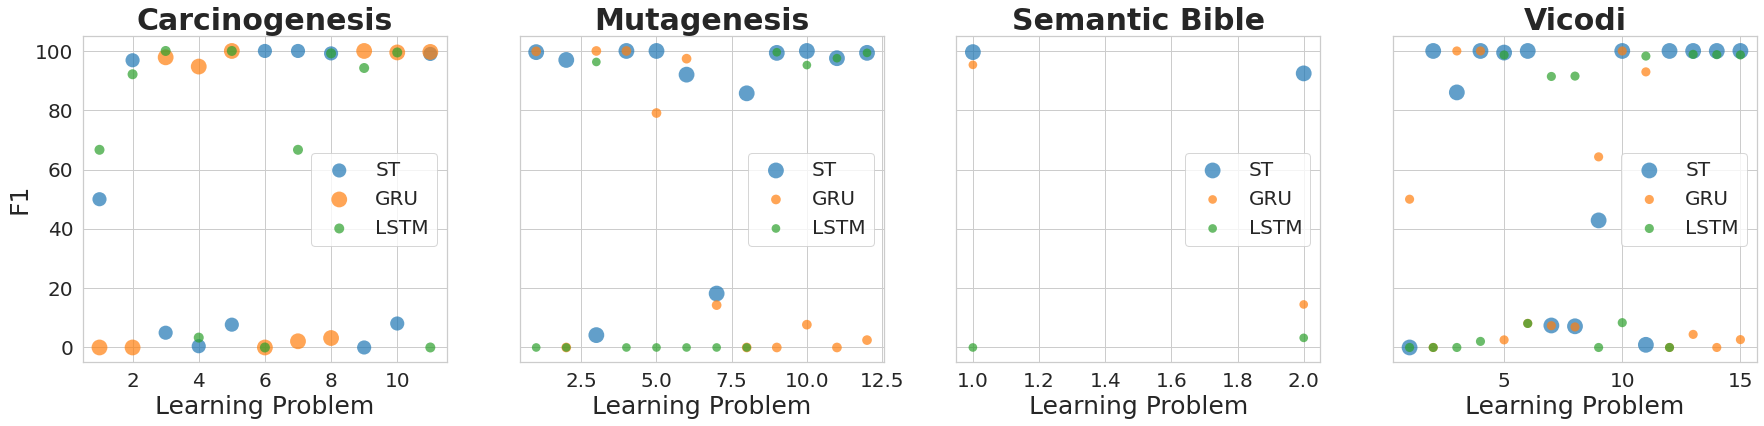

In [50]:
show_performance([[Res1, top1], [Res2, top2], [Res3, top3], [Res4, top4]])

## Training curves

In [30]:
def plot_acc_curves(plt_data1, plt_data2, plt_data3, plt_data4, name1, name2, name3, name4, mode='hard'):

    Markers = ['--', ':', '-']
    Colors = ['tab:blue', 'tab:orange', 'tab:green']
    i = 0
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(30,6), sharey=True)
    
    for crv in plt_data1[f'{mode} acc']:
        mk = Markers[i%3]
        c = Colors[i%3]
        ax1.plot(crv, mk, markersize=3, linewidth=3, color=c)
        i += 1
    leg1 = ax1.legend(('ST', 'GRU', 'LSTM'), prop={'size': 20})
    for line in leg1.get_lines():
        line.set_linewidth(4.0)
    ax1.set_title(name1, fontsize=30, fontweight="bold")
    ax1.set_xlabel('Epochs', fontsize=25, fontweight="bold")
    ax1.set_ylabel(mode.capitalize()+' Accuracy', fontsize=25)
    ax1.tick_params(axis='both', which='major', labelsize=20)

    for crv in plt_data2[f'{mode} acc']:
        mk = Markers[i%3]
        c = Colors[i%3]
        ax2.plot(crv, mk, markersize=3, linewidth=3, color=c)
        i += 1   
    leg2 = ax2.legend(('ST', 'GRU', 'LSTM'), prop={'size': 20})
    for line in leg2.get_lines():
        line.set_linewidth(4.0)
    ax2.set_title(name2, fontsize=30, fontweight="bold")
    ax2.set_xlabel('Epochs', fontsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=20)

    for crv in plt_data3[f'{mode} acc']:
        mk = Markers[i%3]
        c = Colors[i%3]
        ax3.plot(crv, mk, markersize=3, linewidth=3, color=c)
        i += 1
    leg3 = ax3.legend(('ST', 'GRU', 'LSTM'), prop={'size': 20})
    for line in leg3.get_lines():
        line.set_linewidth(4.0)
    ax3.set_title(name3, fontsize=30, fontweight="bold")
    ax3.set_xlabel('Epochs', fontsize=25)
    ax3.tick_params(axis='both', which='major', labelsize=20)

    for crv in plt_data4[f'{mode} acc']:
        mk = Markers[i%3]
        c = Colors[i%3]
        ax4.plot(crv, mk, markersize=3, linewidth=3, color=c)
        i += 1
    leg4 = ax4.legend(('ST', 'GRU', 'LSTM'), prop={'size': 20})
    for line in leg4.get_lines():
        line.set_linewidth(4.0)
    ax4.set_xlabel('Epochs', fontsize=25)
    ax4.set_title(name4, fontsize=30, fontweight="bold")
    ax4.tick_params(axis='both', which='major', labelsize=20)
    
    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'accuracy-curves-all-KBs_{mode}.pdf', bbox_inches='tight')
    fig.show()

In [6]:
plot_data = [{'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}]
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    for model in ["SetTransformer", "GRU", "LSTM"]:
        with open(f'datasets/{kb}/Plot_data/{model}_plot_data.json') as file:
            data = json.load(file)
            for mode in ['soft acc', 'hard acc']:
                plot_data[i][mode].append(data[mode])

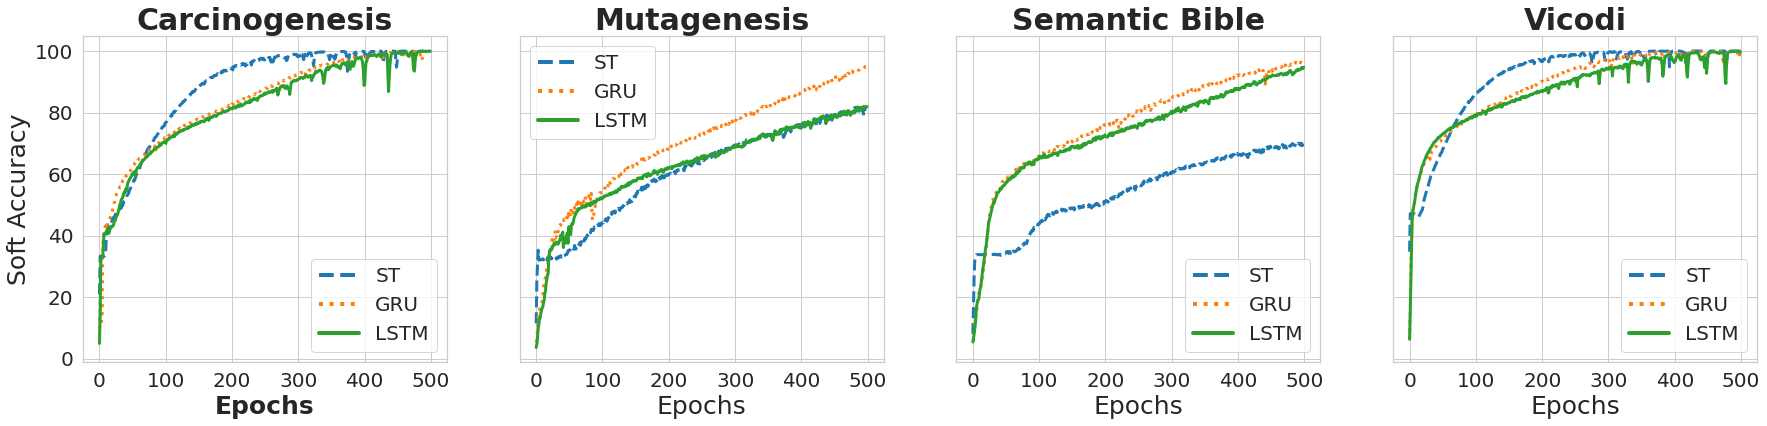

In [31]:
name1, name2, name3, name4 = 'Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi'
plot_acc_curves(plot_data[0], plot_data[1], plot_data[2], plot_data[3], name1, name2, name3, name4, mode='soft')

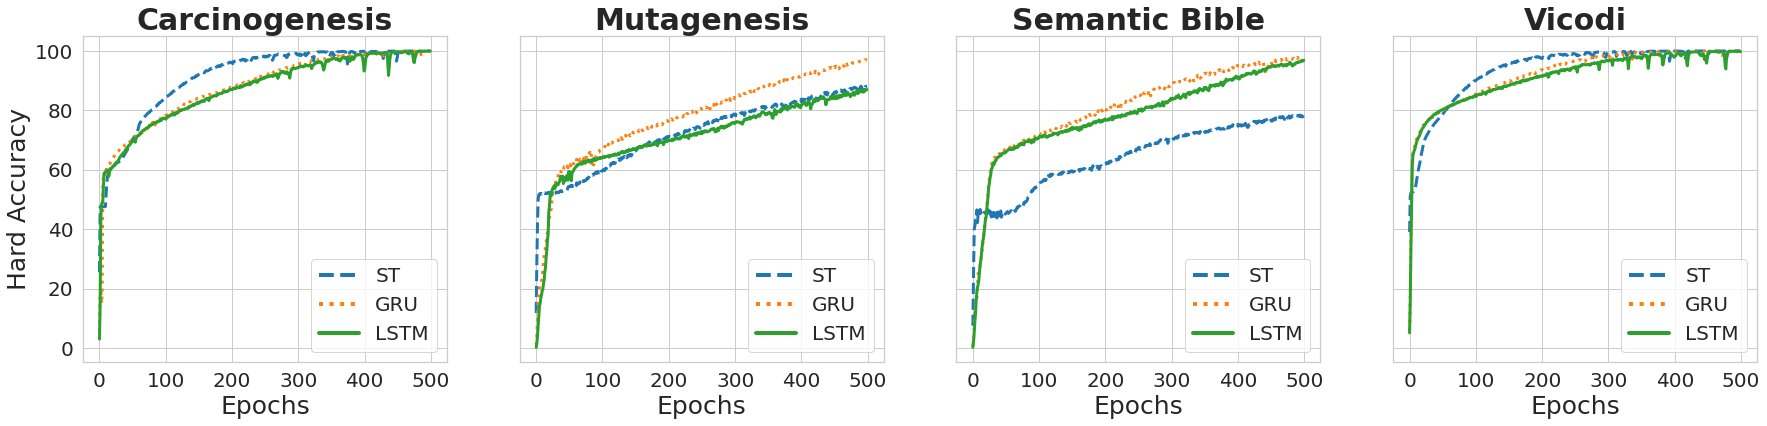

In [27]:
plot_acc_curves(plot_data[0], plot_data[1], plot_data[2], plot_data[3], name1, name2, name3, name4)